In [8]:
# importing dependencies
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

In [2]:
weather = pd.read_csv("~/Projects/NiceRide/Weather_data/01012010_12312017.csv") # Weather data

temp = []
for x in [2010 + x for x in range(8)] :
#   add dtype declaration to remove warning
    x = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/"+str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
                   # dtype = {"Start station ID" : pd.int64, "End station ID" : pd.int64, "Account type": pd.Categorical}
    temp.append(x)
    nr = pd.concat(temp)

/home/grimoire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Changing dates from objects into datetimes
weather['DATE'] = weather['DATE'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

nr['Start date'] = nr['Start date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))
nr['End date'] = nr['End date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [4]:
"""Compute Pearson correlation coefficient between two arrays."""

def pearson_r(x, y):
    # Compute correlation matrix & return entry [0,1]
    return np.corrcoef(x, y)[0,1]

In [5]:
def daily_riders_count(df) :
    '''
    function to count all rides per datetime instance
    returns the count of rides per day
    '''
    # Create a defaultdict of an integer:all_rides
    all_rides = defaultdict(int)

    # Loop over row in df
    for index, row in df.iterrows() :
        # Add the total rides per instance into all_rides
        all_rides[row[0]] += 1
    
    return pd.Series(all_rides).resample('D').count()

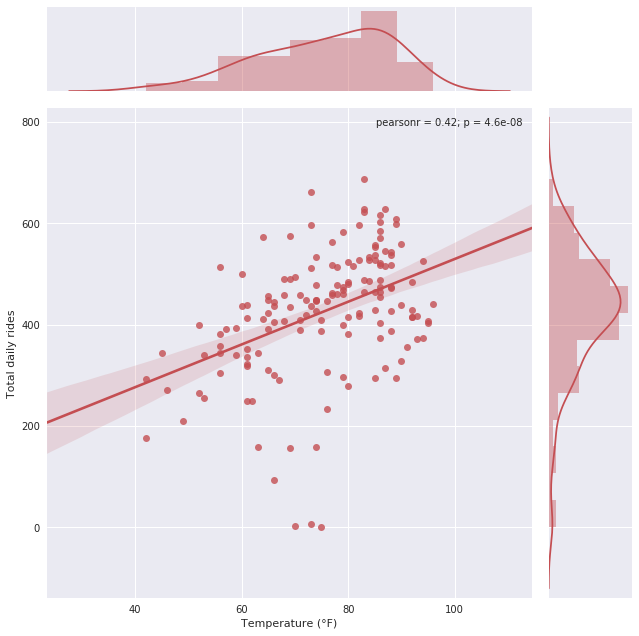

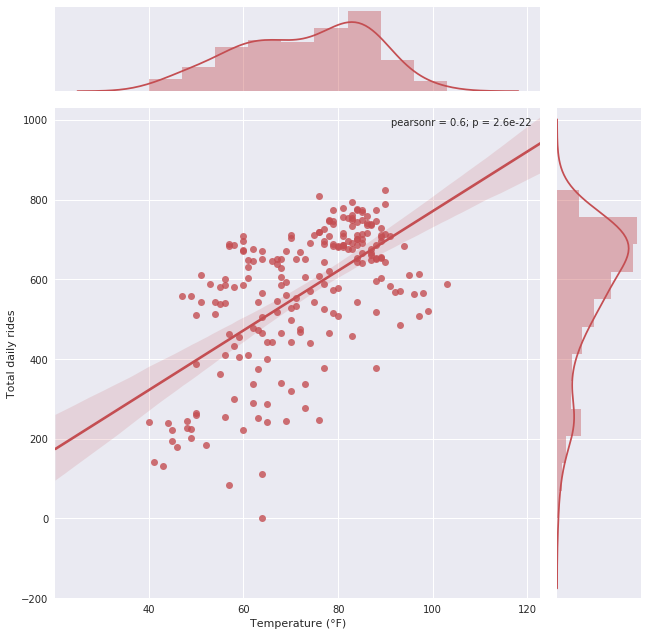

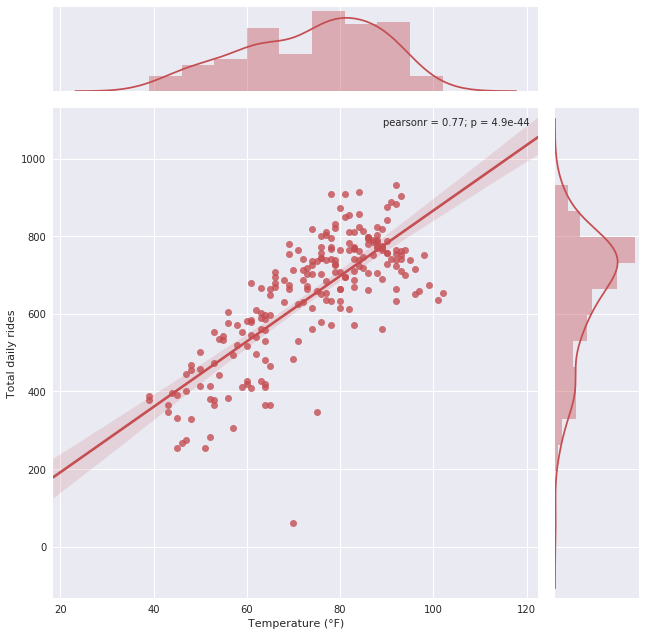

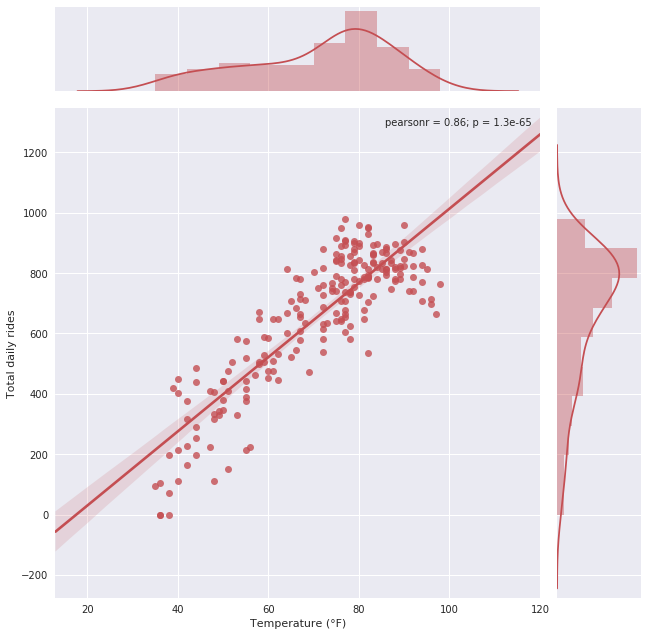

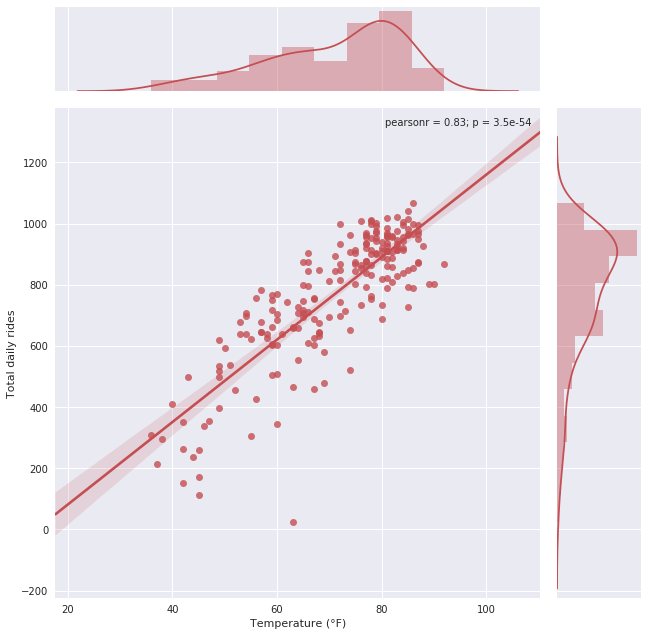

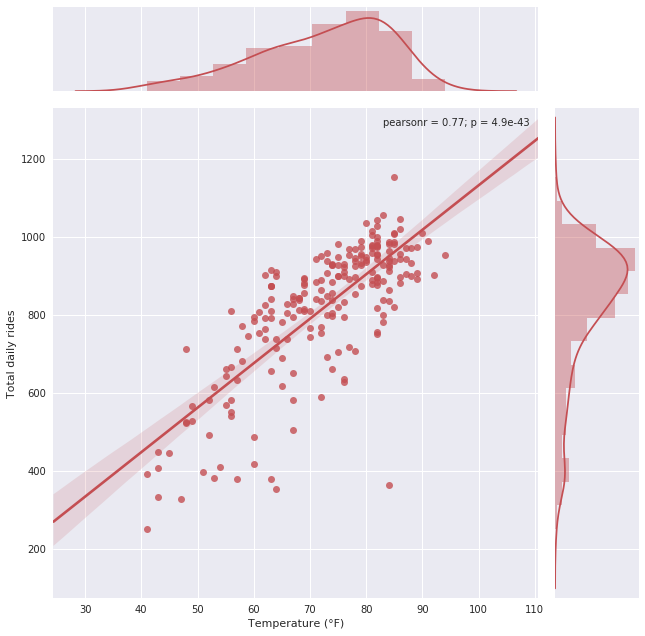

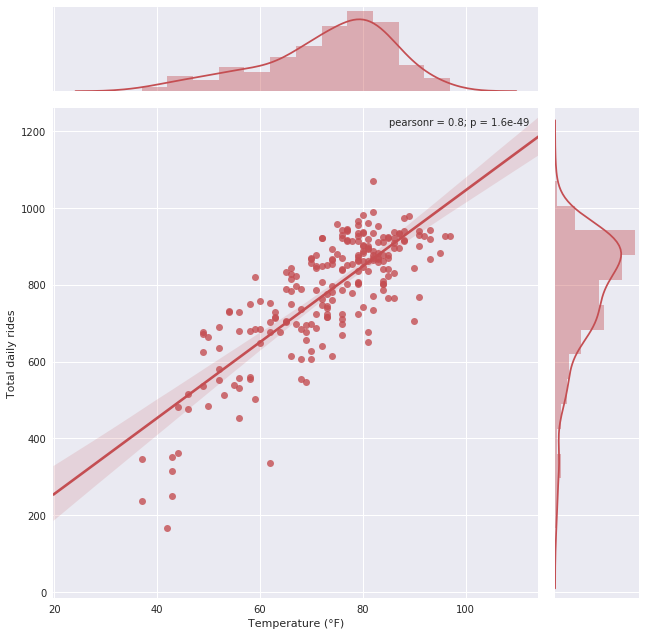

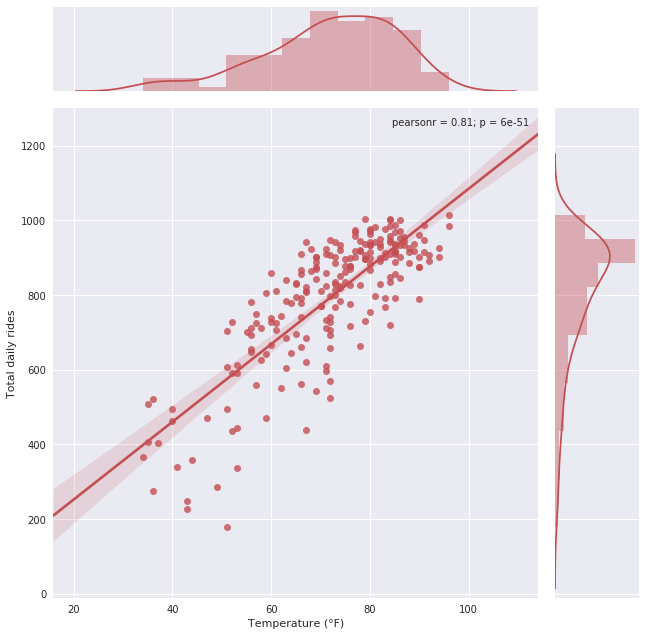

In [11]:
for x in [2010 + x for x in range(8)] :
    #Slice the data by year and NiceRide season
    weather_temp = weather[(weather.DATE>dt.date(x,3,31)) & (weather.DATE<dt.date(x,12,1))]
    nr_temp = nr[(nr['Start date']>dt.date(x,3,31)) & (nr['End date']<dt.date(x,12,1))]
    
    
    # Setting up the data for jointplot graphing
    daily_total_temp = daily_riders_count(nr_temp)
    troublesome = pd.merge(weather_temp, daily_total_temp.reset_index(), how='left', left_on='DATE', right_on='index')
    df = troublesome.drop(['STATION', 'NAME', 'index', 'TAVG'], axis=1).rename(columns={0: 'RCNT'}).dropna()
    
    # Graphing the jointplots
    sns.set(style="darkgrid", color_codes=True)
    sns.jointplot('TMIN', 'RCNT', data=df, kind='reg', color='r', size=9)
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Total daily rides')
    plt.margins(.02)
    plt.savefig(str(x)+'_TMIN_jointplot.png', bbox_inches='tight')


[Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017')]

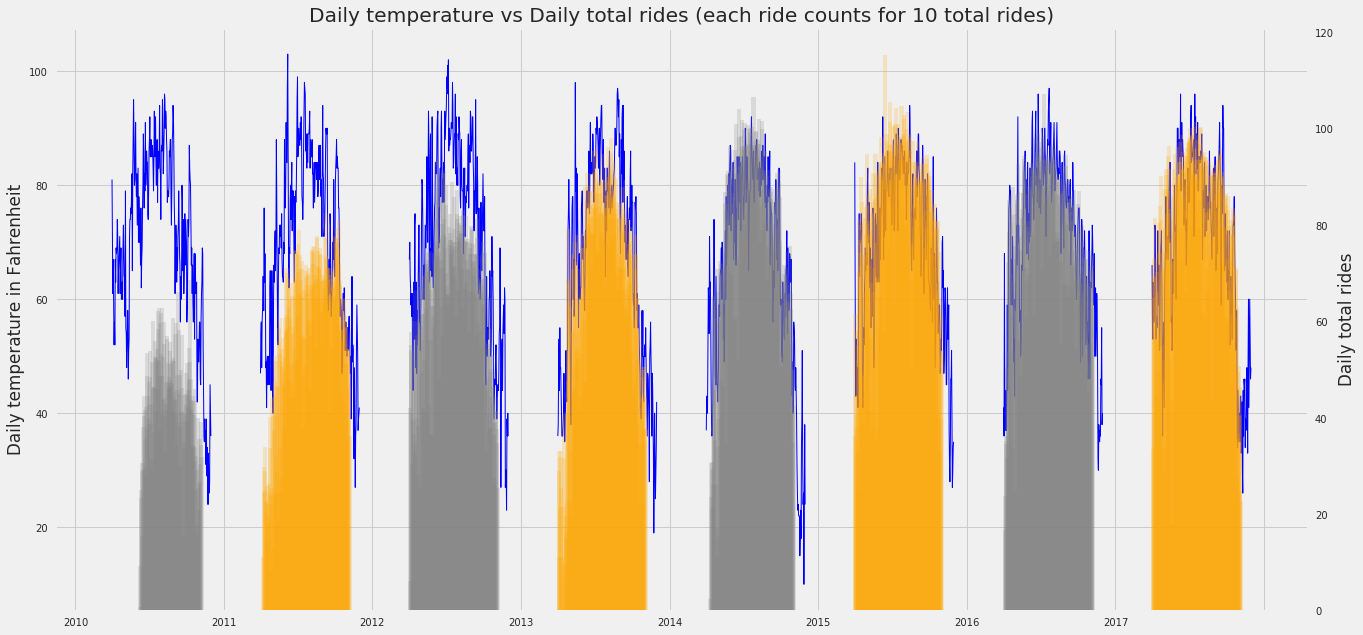

In [19]:
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

labels = []
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis

for x in [2010 + x for x in range(8)] :
    #Slice the data by year and NiceRide season
    weather_temp = weather[(weather.DATE>dt.date(x,3,31)) & (weather.DATE<dt.date(x,12,1))]
    nr_temp = nr[(nr['Start date']>dt.date(x,3,31)) & (nr['End date']<dt.date(x,12,1))]
    
    daily_total_temp = daily_riders_count(nr_temp) / 10
    
    ax1.plot(weather_temp.DATE, weather_temp.TMAX,linestyle='-', linewidth=1,color='blue')
    if x % 2 : # Changes color scheme based by year
        ax2.bar(daily_total_temp.index, daily_total_temp,width=10, alpha=0.2, color='orange')
    else:
        ax2.bar(daily_total_temp.index, daily_total_temp,width=10, alpha=0.2, color='grey')
    
    labels.append(str(x))
    
ax2.grid(b=False)
ax1.set_title('Daily temperature vs Daily total rides (each ride counts for 10 total rides)')
ax1.set_ylabel('Daily temperature in Fahrenheit')
ax2.set_ylabel('Daily total rides')
ax1.axes.set_xticklabels(labels)

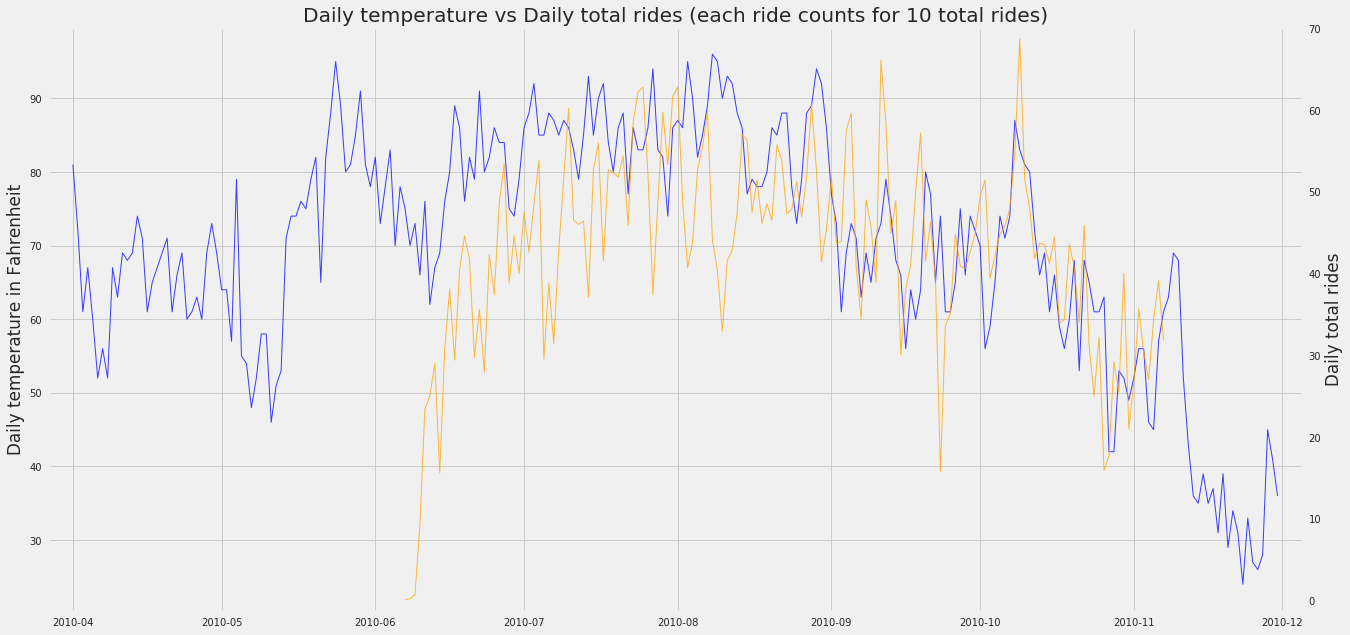

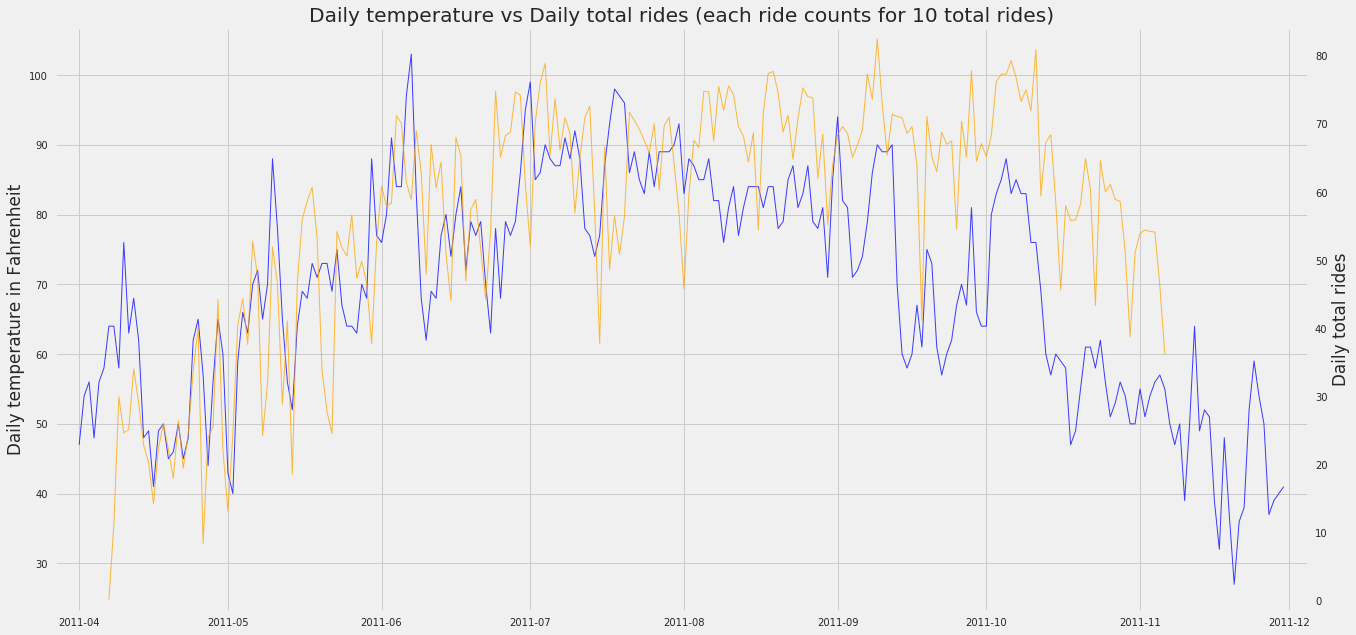

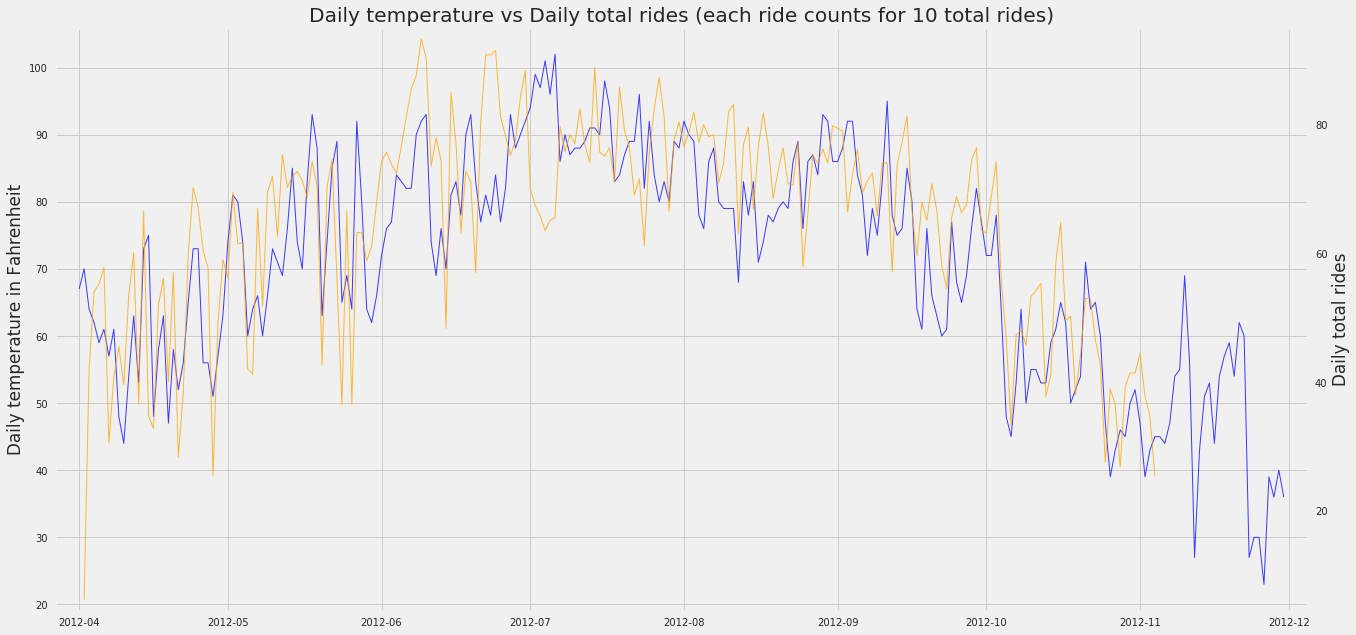

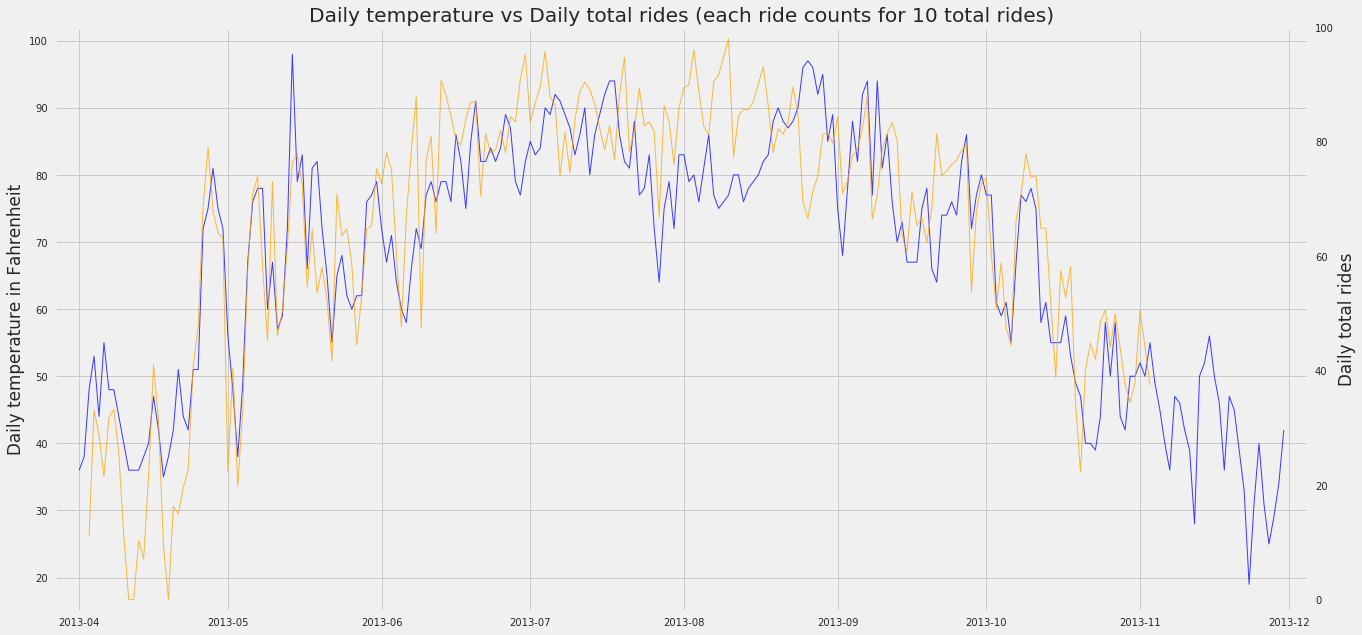

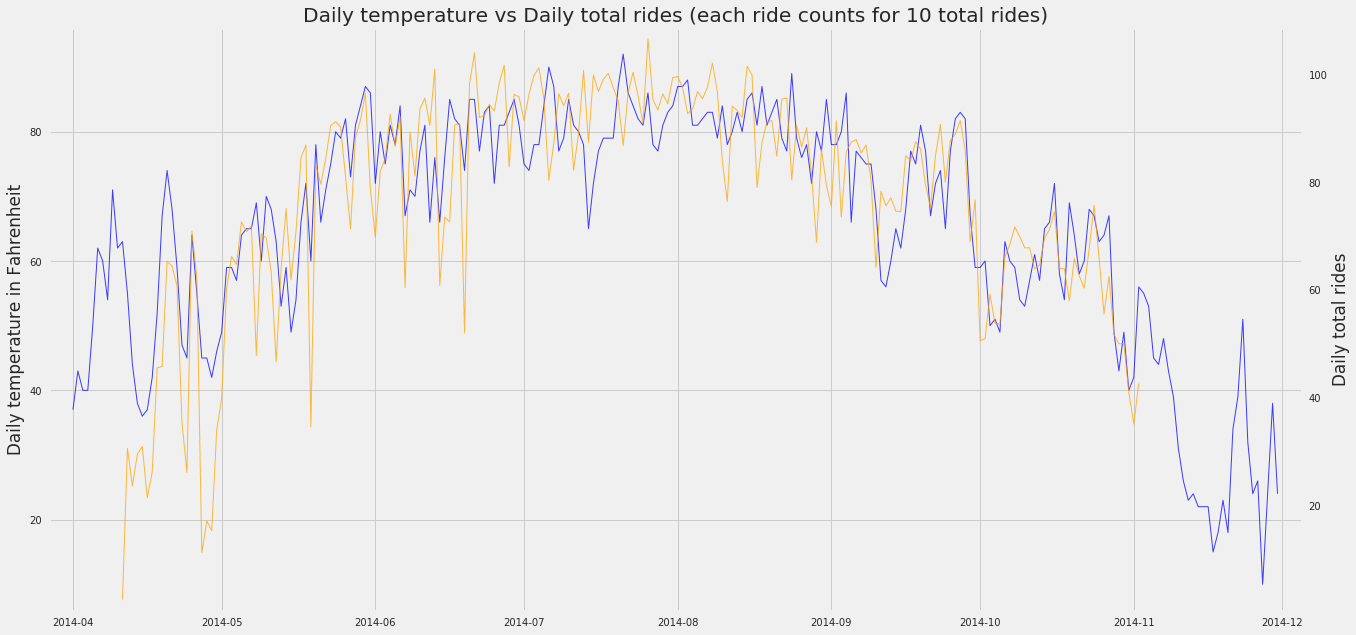

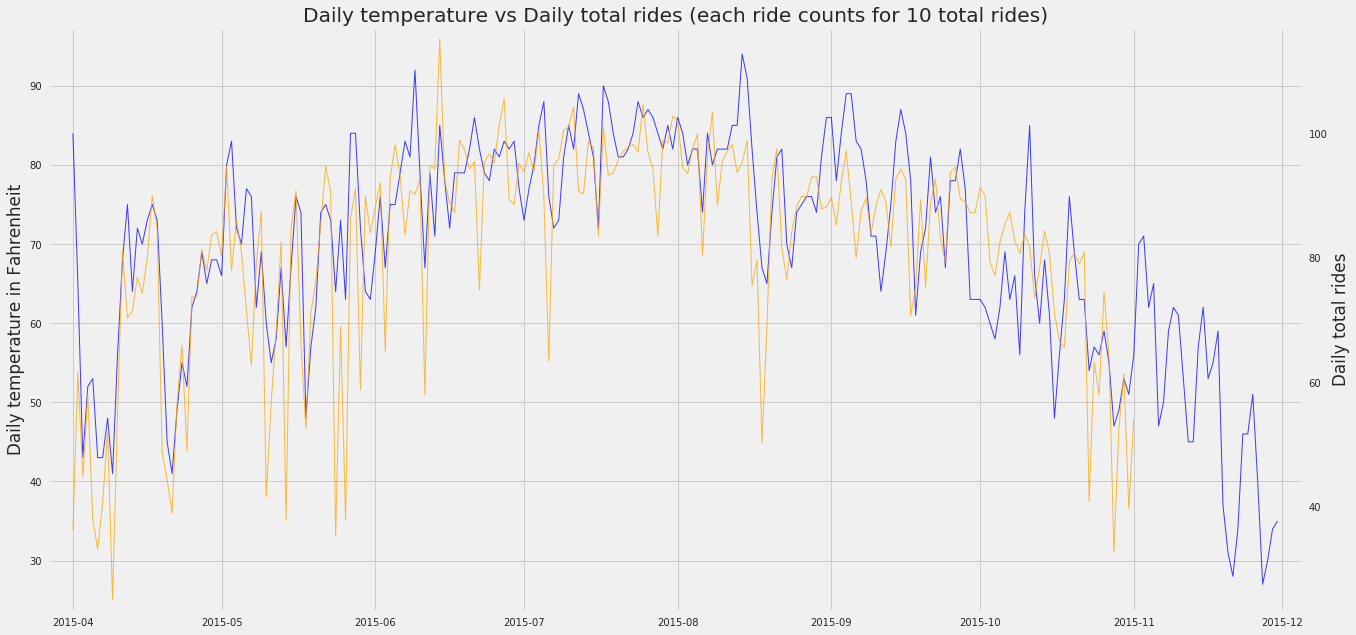

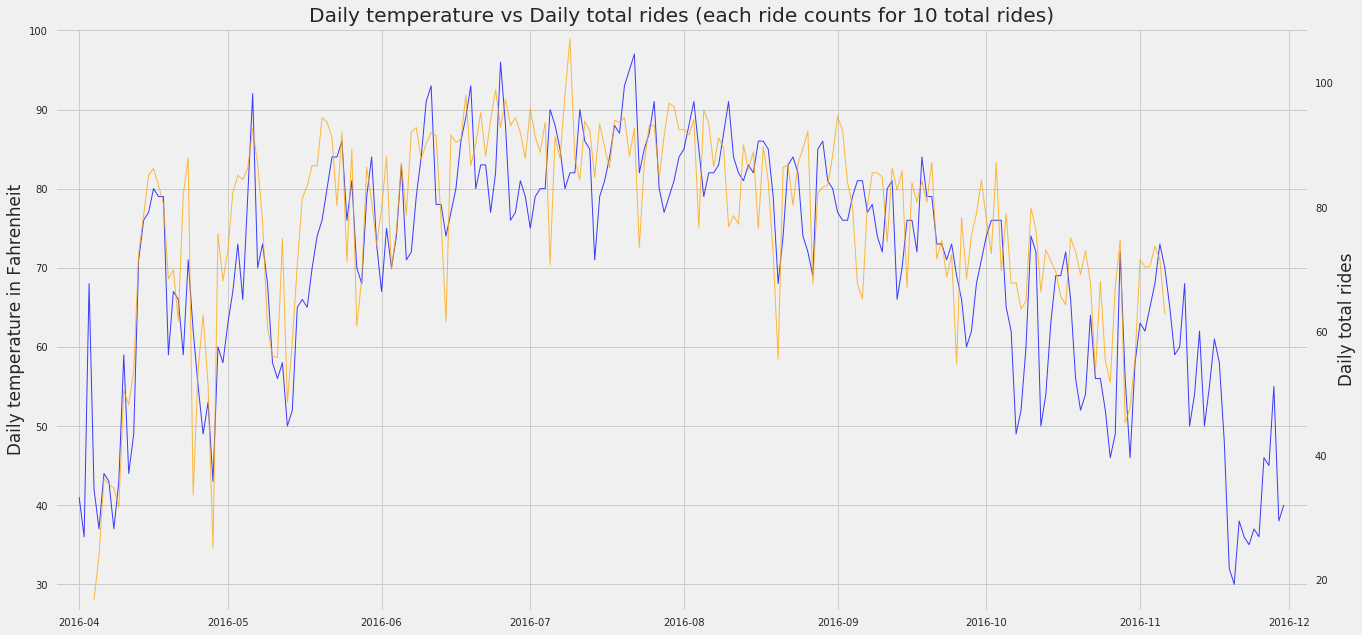

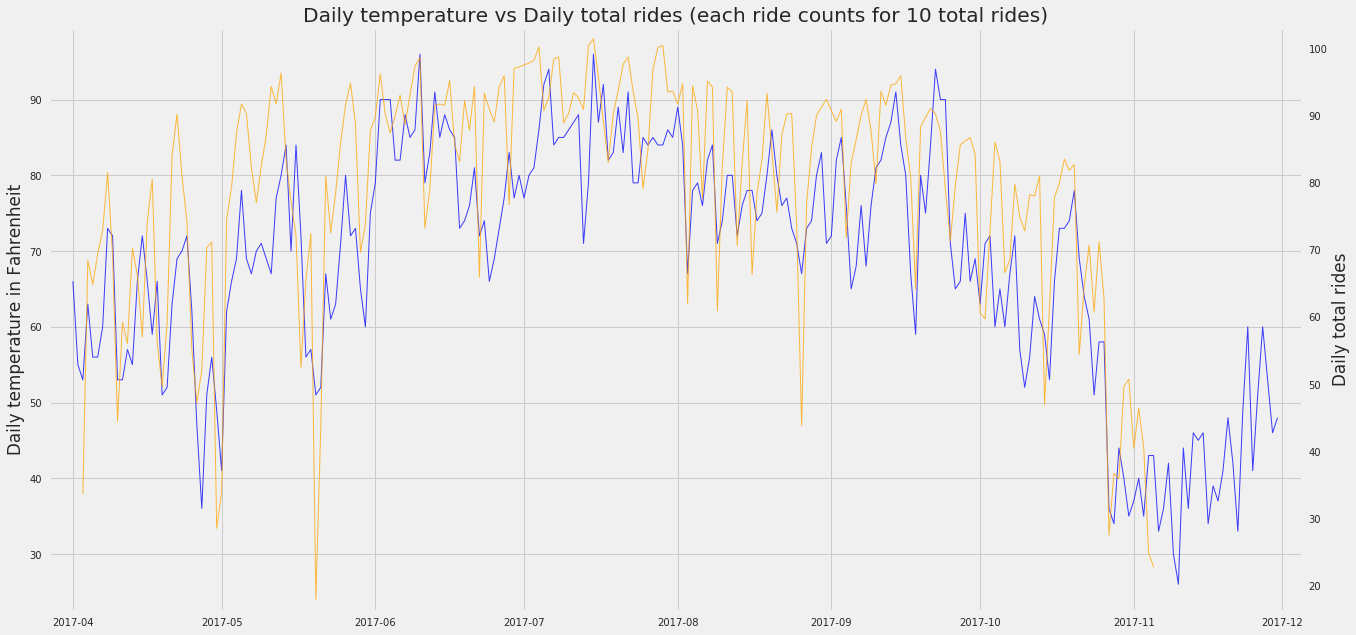

In [33]:
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

for x in [2010 + x for x in range(8)] :
    #Slice the data by year and NiceRide season
    weather_temp = weather[(weather.DATE>dt.date(x,3,31)) & (weather.DATE<dt.date(x,12,1))]
    nr_temp = nr[(nr['Start date']>dt.date(x,3,31)) & (nr['End date']<dt.date(x,12,1))]
    
    daily_total_temp = daily_riders_count(nr_temp) / 10
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()  # set up the 2nd axis
    ax2.grid(b=False)
    ax1.set_title('Daily temperature vs Daily total rides (each ride counts for 10 total rides)')
    ax1.set_ylabel('Daily temperature in Fahrenheit')
    ax2.set_ylabel('Daily total rides')
    
    ax1.plot(weather_temp.DATE, weather_temp.TMAX,linestyle='-', linewidth=1, alpha=0.75, color='blue')
    ax2.plot(daily_total_temp.index, daily_total_temp,linestyle='-', linewidth=1, alpha=0.75, color='orange')
    
    plt.margins(.02)
    plt.savefig(str(x)+'_weather_ride_trendlines.png', bbox_inches='tight')